## Kaggle [Gender Recognition by Voice]
- https://www.kaggle.com/primaryobjects/voicegender

### Kernel을 참조하여 데이터 전처리 및 시각화를 진행함
- https://www.kaggle.com/sushanthiray/d/primaryobjects/voicegender/experimenting-with-neural-networks-in-tensorflow/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
# DataFrame에 null이 있으면 True, 없으면 False를 원 데이터 형태로 표현
pd.isnull(df)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# 만약 True가 있으면 DataFrame의 해당 인덱스가 출력됨
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
print(np.where([True, False, True, False, False]))

(array([0, 2]),)


In [6]:
!pip install missingno

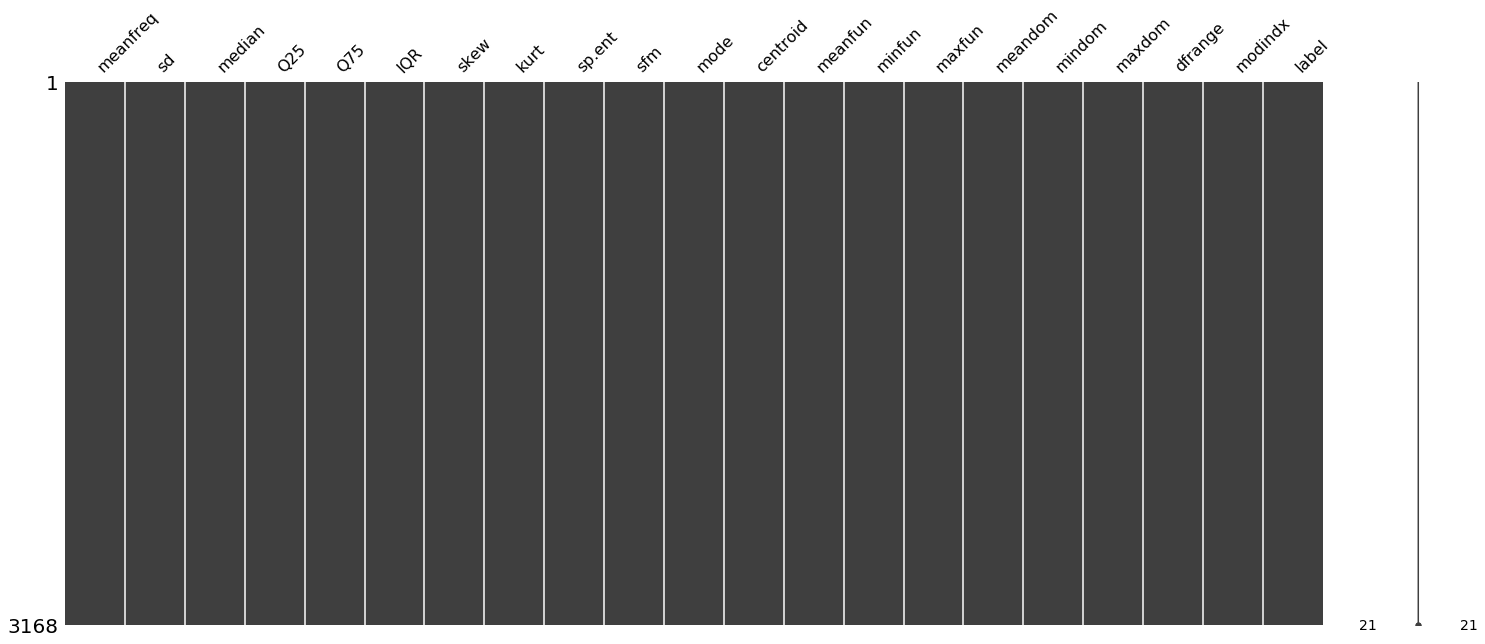

In [7]:
import missingno
missingno.matrix(df)

Awesome. We don't have any null's in the dataset. One less thing to worry about. Now let us check how the labels are distributed.

In [8]:
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Number of male: 1584
Number of female: 1584


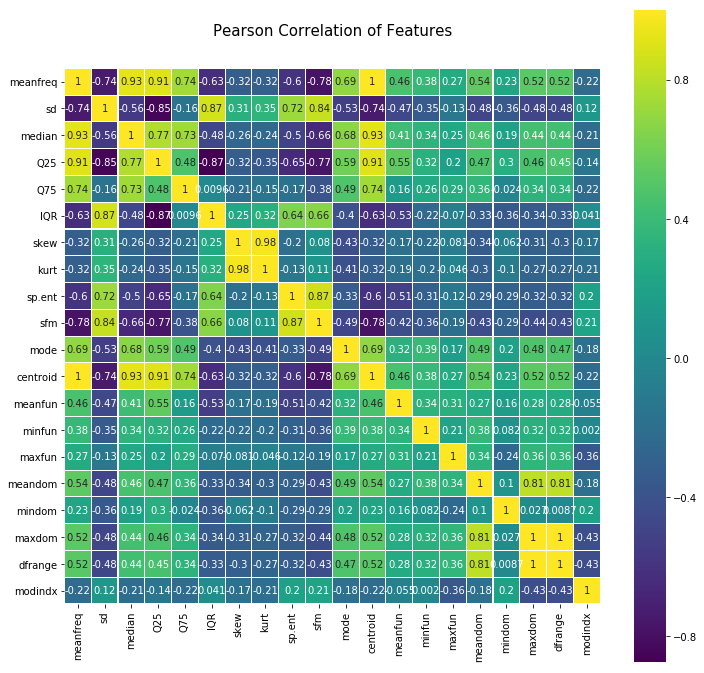

In [9]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

While looking at the plot, we can figure out some interesting correlations. If you look at meanfreq vs centroid their correlation is maximum possible value of 1. Same is the case with maxdom and dfrange. So essentially we could filter out these features and still get an equivalent performance as they aren't adding any new information.

In [10]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

## Train / Validation (dev) / Test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.375,
                                                  random_state = 123)

In [13]:
# Training 50%, validation 30%, test 20%
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1583, 20)
(951, 20)
(634, 20)


## Decision tree modeling
- 나무 깊이에 대해 다른 파라미터값 부여
- 각각의 파라미터에 대해 Train set으로 모델을 생성한 후, Validation set으로 성능 평가 ==> 가장 성능이 좋은 파라미터와 모델 선택
- Test set으로 모델의 예측 성능 평가

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

depth_set = [3, 4, 5, 6, 7, 8, 9, 10]
dt_models = []
accuracy_set = []
cm_set = []
train_accuracy_set = []

for depth in depth_set:
    model = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    y_val_hat = model.predict(X_val)
    train_accuracy = metrics.accuracy_score(y_train, 
                                            y_train_hat)
    accuracy = metrics.accuracy_score(y_val, y_val_hat)
    cm = metrics.confusion_matrix(y_val, y_val_hat)
    
    dt_models.append(model)
    accuracy_set.append(accuracy)
    train_accuracy_set.append(train_accuracy)
    cm_set.append(cm)

In [15]:
from pprint import pprint
pprint(accuracy_set)

[0.961093585699264,
 0.9663512092534174,
 0.9674027339642481,
 0.9674027339642481,
 0.9684542586750788,
 0.9674027339642481,
 0.9631966351209253,
 0.9631966351209253]


In [16]:
pprint(train_accuracy_set)

[0.9734680985470625,
 0.9778900821225521,
 0.9842072015161086,
 0.9873657612128869,
 0.9917877447883765,
 0.9936828806064435,
 0.9968414403032217,
 0.998104864181933]


In [17]:
# 파라미터 탐색 결과, 가장 좋은 모델과 Validation set에 대한 정확도
max_value = max(accuracy_set)
max_index = accuracy_set.index(max_value)
print(max_index)
print(max_value)

4
0.9684542586750788


In [18]:
# 가장 좋은 모델
dt_models[max_index]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [19]:
# 가장 좋은 모델을 가져와 Test set에 대해 예측 성능 평가
y_test_hat = dt_models[max_index].predict(X_test)
print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))

0.9511041009463722
[[308  20]
 [ 11 295]]


## Random Forest
- 나무의 갯수, 각 나무의 변수 선택 수를 파라미터로 설정
- 각각의 파라미터 집합에 대해 Train set으로 모델을 생성한 후, Validation set으로 성능 평가 ==> 가장 성능이 좋은 파라미터와 모델 선택
- Test set으로 모델의 예측 성능 평가

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
max_features_set = ['auto', 'log2']

rf_models = []
accuracy_set = []
cm_set = []

for n_estimators in n_estimators_set:
    for max_features in max_features_set:
        rf = RandomForestClassifier(n_estimators = n_estimators,
                                    max_features = max_features,
                                    random_state = 123)
        rf.fit(X_train, y_train)
        y_val_hat = rf.predict(X_val)
        accuracy = metrics.accuracy_score(y_val, y_val_hat)
        cm = metrics.confusion_matrix(y_val, y_val_hat)

        rf_models.append(rf)
        accuracy_set.append(accuracy)
        cm_set.append(cm)

In [22]:
accuracy_set

[0.9768664563617245,
 0.9768664563617245,
 0.9810725552050473,
 0.9810725552050473,
 0.9842271293375394,
 0.9842271293375394,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.9789695057833859,
 0.9789695057833859,
 0.9810725552050473,
 0.9810725552050473,
 0.9779179810725552,
 0.9779179810725552]

In [23]:
# 파라미터 탐색 결과, 가장 좋은 모델과 Validation set에 대한 정확도
max_value = max(accuracy_set)
max_index = accuracy_set.index(max_value)
print(max_index)
print(max_value)

4
0.9842271293375394


In [24]:
# 가장 좋은 모델
rf_models[max_index]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [25]:
# 가장 좋은 모델을 가져와 Test set에 대해 예측 성능 평가
y_test_hat = rf_models[max_index].predict(X_test)
print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))

0.9794952681388013
[[317  11]
 [  2 304]]


In [26]:
fi = rf_models[max_index].feature_importances_

In [27]:
fi

array([0.03508569, 0.11775025, 0.01860319, 0.11633264, 0.00813649,
       0.25812319, 0.00894437, 0.00739931, 0.04049888, 0.04234854,
       0.02452311, 0.01687083, 0.23891503, 0.00724491, 0.00464811,
       0.01465709, 0.00957931, 0.00987846, 0.00904596, 0.01141464])

In [28]:
col_names = X.columns

In [29]:
for i, j in zip(col_names, fi): print(i, '\t', j)

meanfreq 	 0.0350856929283691
sd 	 0.11775025219337448
median 	 0.01860318915399293
Q25 	 0.11633263990480384
Q75 	 0.008136490880790517
IQR 	 0.2581231850909952
skew 	 0.008944371458857231
kurt 	 0.007399305188059135
sp.ent 	 0.040498882940432815
sfm 	 0.04234854225225207
mode 	 0.024523108577059152
centroid 	 0.016870829105954478
meanfun 	 0.23891502524860195
minfun 	 0.007244914477589194
maxfun 	 0.004648109341227464
meandom 	 0.014657090512203826
mindom 	 0.009579308472501779
maxdom 	 0.009878461969294148
dfrange 	 0.009045963330176838
modindx 	 0.011414636973463876


In [30]:
print(metrics.classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

      female       0.99      0.97      0.98       328
        male       0.97      0.99      0.98       306

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



# 실습
1. LogisticRegression, kNearestClassifier, naive Bayes Classifier 등을 사용하여 모델 하이퍼파라미터 탐색 및 베스트 모델을 뽑아보세요.
2. Decision Tree, Random Forest에 대해서 다른 후보군으로 모델 하이퍼파라미터 탐색을 및 베스트 모델을 뽑아보세요.

In [33]:
from sklearn.linear_model import LogisticRegression

# Hyper-parameter caldidates
penalty_set = ['l1', 'l2']
C_set = [0.01, 0.1, 1, 10, 100]
class_weight_set = [None, 'balanced']

# 결과 저장을 미리 할당하기 위한 리스트 선언
train_acc_set = []
val_acc_set = []
lrs = []

for penalty in penalty_set:
    for C in C_set:
        for class_weight in class_weight_set:
            lr = LogisticRegression(penalty=penalty, C=C, 
                                    class_weight=class_weight,
                                    random_state=2072)
            # Train the model
            lr.fit(X_train, y_train)
            lrs.append(lr)
            
            # Calculate training accuracy and validation accuracy
            y_train_hat = lr.predict(X_train)
            y_val_hat = lr.predict(X_val)
            train_acc = metrics.accuracy_score(y_train, y_train_hat)
            val_acc = metrics.accuracy_score(y_val, y_val_hat)
            train_acc_set.append(train_acc)
            val_acc_set.append(val_acc)
            

/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

In [36]:
# 파라미터 탐색 결과, 가장 좋은 모델과 Validation set에 대한 정확도
max_value = max(val_acc_set)
max_index = val_acc_set.index(max_value)
print(max_index)
print(max_value)

6
0.9779179810725552


In [37]:
# 가장 좋은 모델을 가져와 Test set에 대해 예측 성능 평가
y_test_hat = lrs[max_index].predict(X_test)
print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))

0.9652996845425867
[[311  17]
 [  5 301]]


In [43]:
# Trainining set과 Validation set을 합친 후 Test set에 대해 예측 성능 평가
X_concat = pd.concat([X_train, X_val])
y_concat = pd.concat([y_train, y_val])
# 합친 데이터에 모델을 refit
best_lr = lrs[max_index]
best_lr.fit(X_concat, y_concat)
# Test set에 대해 예측 성능 평가
y_test_hat = best_lr.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))

0.9700315457413249
[[313  15]
 [  4 302]]


/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
